# Summarizing metrics from SDT horiz lines

Leanne Friedrich 5/4/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_horiz_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'horizSDTSummaries.csv')
                             , diag=True)

Independents: 
	 printFolder, int_Ca, bn, date, sigma, fluFile, calibFile, spacing, vRatio, dEst, viscRatio, rGrav, int_Re, ReRatio, hDragP, vDragP, int_CaInv, pressureCh0
	 sup_Ca, sup_dnorm, sup_We, sup_Oh, sup_shortname, sup_days, sup_rheModifier, sup_surfactant, sup_surfactantWt, sup_dye, sup_var, sup_val, sup_base, sup_type, sup_tau0, sup_eta0, sup_density, sup_v, sup_rate, sup_visc0, sup_CaInv, sup_Re, sup_WeInv, sup_OhInv, sup_dPR, sup_dnormInv, sup_Bm
	 ink_Ca, ink_dnorm, ink_We, ink_Oh, ink_shortname, ink_days, ink_rheModifier, ink_surfactant, ink_surfactantWt, ink_dye, ink_var, ink_val, ink_base, ink_type, ink_tau0, ink_eta0, ink_density, ink_v, ink_rate, ink_visc0, ink_CaInv, ink_Re, ink_WeInv, ink_OhInv, ink_dPR, ink_dnormInv, ink_Bm

Dependents:  yBot, dy0l, dyfl, segments, yTop, w, h, yc, roughness, emptiness, meanT, stdevT, minmaxT, dy0lr, dyflr, space_l, space_b, ldiff


,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


In [13]:
ms.keyTableVar('segments')

,1,2,3
wp,,,
wo,segments_w1o,segments_w2o,segments_w3o
wrelax,delta_segments_w1relax,delta_segments_w2relax,delta_segments_w3relax
write,,delta_segments_write2,
dp,,,
do,segments_d1o,segments_d2o,
drelax,delta_segments_d1relax,delta_segments_d2relax,
disturb,delta_segments_disturb1,delta_segments_disturb2,


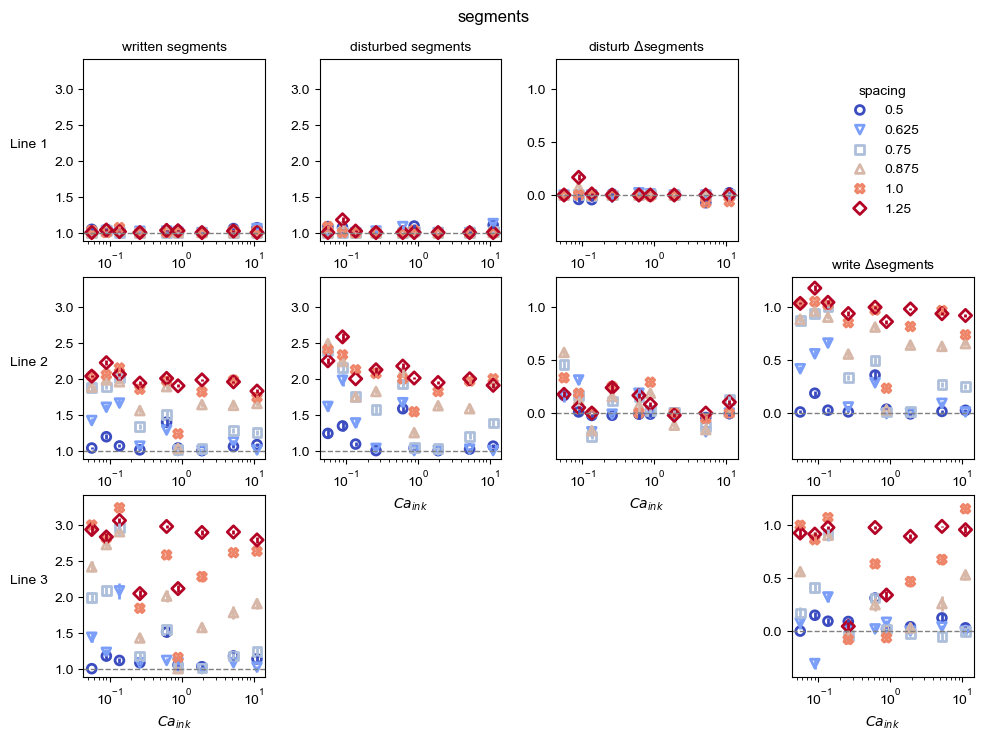

In [6]:
yvl = mp.yvarlines(ms, ms.ss, xvar='ink_Ca', yvar='segments', zvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0)

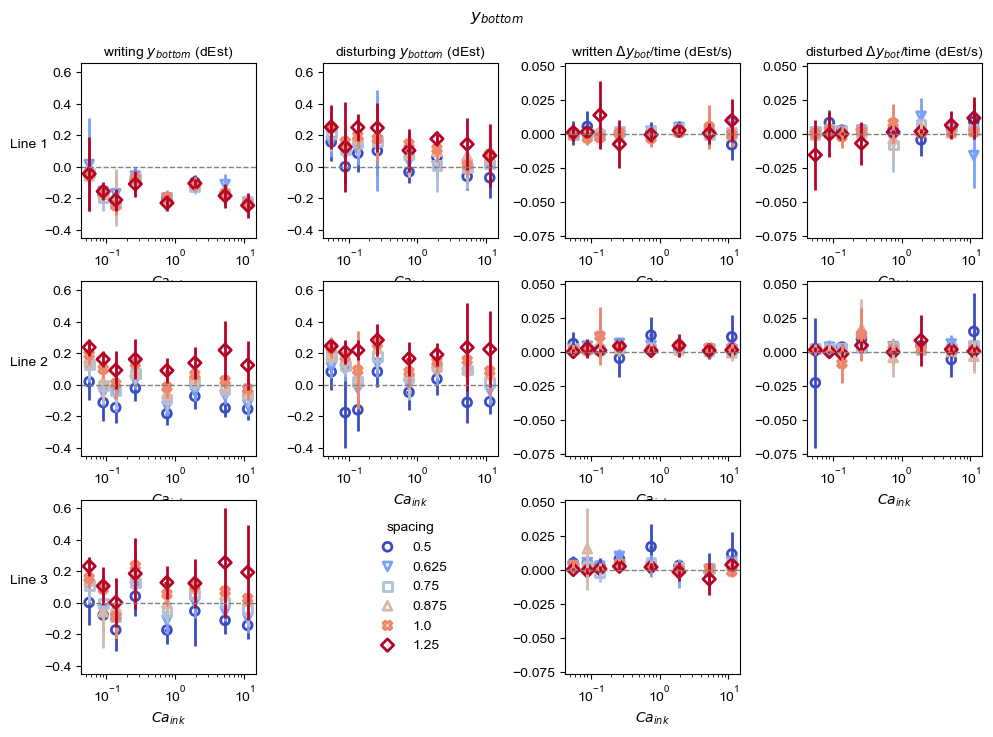

In [9]:
yvl = mp.yvarlines(ms, ms.ss, xvar='ink_Ca', yvar='yBot', zvar='spacing', llist=[1, 2, 3]
             , plist=['wp', 'dp', 'dwdt', 'dddt'], plotType='notebook', yideal=me.ideals()
                   , logx=True, mode='scatter')

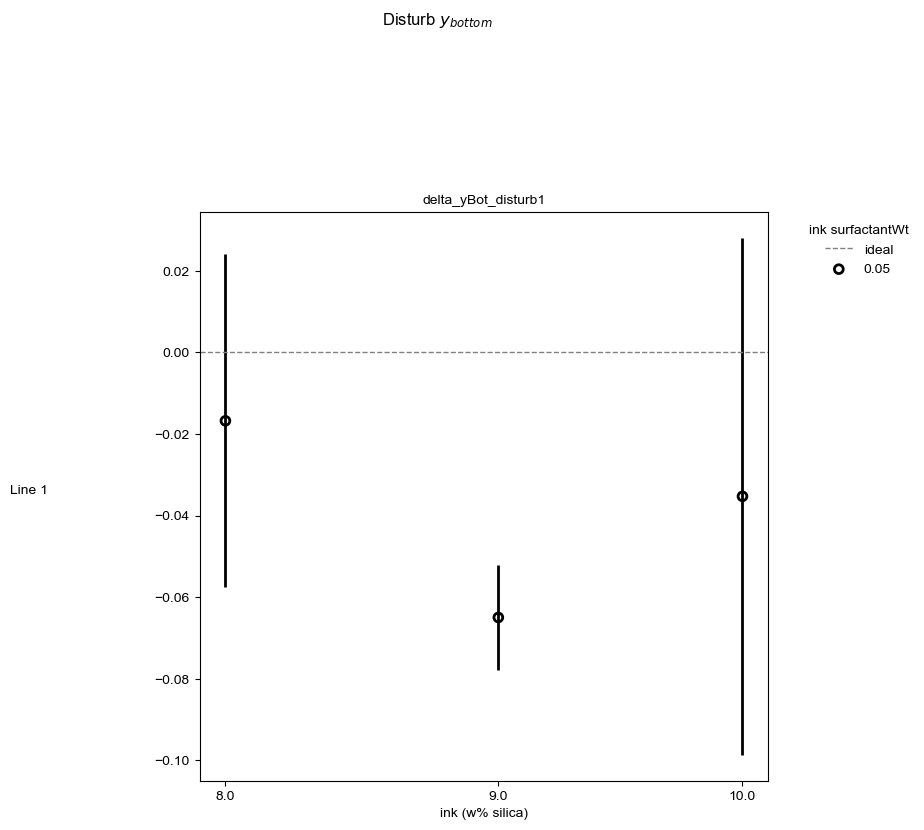

In [80]:
yvl = mp.yvarlines(ms, ms.ss[(ms.ss.sup_Ca<100)&(ms.ss.sup_Ca>50)], xvar='ink_val', yvar='yBot', zvar='ink_surfactantWt', llist=[1]
             , plist=[ 'disturb'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0)

In [4]:
yvar = 'segments_w3o'
# rows = ms.ss[(ms.ss[yvar]>0.1)&(ms.ss.spacing==1.25)]
rows = ms.ss[(ms.ss.spacing==0.875)&(ms.ss[yvar]<2)]
# rows = ms.ss[ms.ss[yvar]>0]
rows[['ink_shortname','sup_shortname', 'int_Ca', 'spacing', yvar]]

,ink_shortname,sup_shortname,int_Ca,spacing,segments_w3o
124,SO9,3.0,6.29,0.88,1.62
178,SO6-S20-0.5,3.0,134.69,0.88,1.31
195,SO6-S20-0.5,3.5,305.55,0.88,1.47
213,SO6-S20-0.5,4.0,629.36,0.88,1.94
231,SO7-S20-0.5,3.0,134.69,0.88,1.59
251,SO7-S20-0.5,3.5,305.55,0.88,1.88
269,SO7-S20-0.5,4.0,629.36,0.88,1.88
287,SO8-S20-0.5,3.0,134.69,0.88,1.53
340,SO10-S85-0.05,3.0,15.40,0.88,1.00
358,SO10-S85-0.05,3.5,34.93,0.88,1.00


In [5]:
fh.openExplorer(rows.loc[124]['printFolder'])

In [13]:
for i in [341, 359, 377]:
    folder = rows.loc[i]['printFolder']
    fv = me.folderHorizSDT(folder, overwriteMeasure=True, overwriteSummary=True, diag=0, overrideSegment=False, overwriteCropLocs=False)
    fv.measureFolder();
    fv.summarize();

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.00\I_SO10-S85-0.05_S_3.00_230516\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_failures_I_SO10-S85-0.05_S_3.00_230516_112156_7.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.00\I_SO10-S85-0.05_S_3.00_230516\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_measure_I_SO10-S85-0.05_S_3.00_230516_112156_7.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.00\I_SO10-S85-0.05_S_3.00_230516\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_summary_I_SO10-S85-0.05_S_3.00_230516_112156_7.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.50\I_SO10-S85-0.05_S_3.50_230516\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_failures_I_SO10-S85-0.05_S_3.50_230516_164546_3.csv
INFO: Exported //cfs2e.nist.gov/642/in

In [76]:
rgt = mp.regressionTables(ms, ms.ss, 'roughness_w3o', logy=False, printOut=True, export=False, package='tabular')

\begin{table}[H]
\centering
\caption[Linear regressions for 3rd written roughness at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{3rd written roughness} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:roughness_w3oRegNonZero}
\begin{tabular}{llrrll}
                                         variables &       $r^2$ &     b &      c & Spearman coeff &     Spearman p \\
                                    $\bm{spacing}$ & $\bm{0.23}$ &  0.78 &   0.24 &    $\bm{0.51}$ & $\bm{2.3e-06}$ \\
		\hline
                                         $\bm{Ca}$ & $\bm{0.24}$ &  0.31 &   0.42 &    $\bm{0.52}$ & $\bm{1.4e-06}$ \\
                                        $Ca_{ink}$ &        0.08 &  0.18 &   1.01 &     